In [1]:
import pandas as pd
import math
from csaps import csaps
from scipy.interpolate import splev, splrep
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import interpolate
import os

In [3]:
def readData(folder, alpha0=0.2):
    #time = np.arange(startTime, timeSteps * dTime, dTime)
    t = np.empty(0)
    a = np.empty(0)
    S = 0.05*0.05
    for filename in os.scandir(folder+'/data/015_02'):
    #for filename in os.scandir(folder+'/data/03_035'):
        if filename.is_file():
            tmp = pd.DataFrame(pd.read_csv(filename, header=0)).dropna().to_numpy().T
            t = np.append(t, tmp[0])
            a = np.append(a, tmp[7]/S)
    inds = t.argsort()
    t = t[inds]
    a = a[inds]
    #h = csaps(time, h, time, smooth=0.9995)
    #v = csaps(time, v, time, smooth=0.9995)
    return t, a

t_EF_BP10, a_EF_BP10 = readData('../AF_EntrainmentFront_Sg0_Ag0_BM_STLG10_BP10_EntrRPHF1e-1_Star', 250, 0, 1)
t_EF_BP50, a_EF_BP50 = readData('../AF_EntrainmentFront_Sg0_Ag0_BM_STLG20_BP50_EntrRPHF', 250, 0, 1)
t_EE_BP50, a_EE_BP50 = readData('../AF_EglitEntrainment_U1_UProfileInlet_BP50', 55, 0, 1)
t_EE_BP150, a_EE_BP150 = readData('../AF_EglitEntrainment_U1_UProfileInlet_BP150', 55, 0, 1)
t_EE_BP200, a_EE_BP200 = readData('../AF_EglitEntrainment_U1_UProfileInlet_BP200', 55, 0, 1)

In [5]:
t_EF_BP01, a_EF_BP01 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP1e-1_ERphf1e-1')
t_EF_BP05, a_EF_BP05 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1')
t_EF_BP1, a_EF_BP1 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP1_ERphf1e-1')
t_EF_BP2, a_EF_BP2 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP2_ERphf1e-1')
t_EF_BP50, a_EF_BP50 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP50_ERphf1e-1')
t_EF_BP05_N, a_EF_BP05_N = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1_N')
t_EF_BP05_N_K1em4, a_EF_BP05_N_K1em4 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1_N_K1e-4')
t_EF_BP05_K1em5, a_EF_BP05_K1em5 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1_K1e-5')
t_EF_BP05_K5em5, a_EF_BP05_K5em5 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1_K5e-5')
t_EF_BP05_N05, a_EF_BP05_N05 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1_N0.5')
t_EF_BP05_N07, a_EF_BP05_N07 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1_N0.7')
t_EF_BP05_N1, a_EF_BP05_N1 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1_N1')
t_EF_BP05_N15e1, a_EF_BP05_N15e1 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1_N1.5')
t_EF_BP05_Tau0, a_EF_BP05_Tau0 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1_Tau0')
t_EF_BP05_Tau1em1, a_EF_BP05_Tau1em1 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1_Tau1e-1')
t_EF_BP05_Tau5em2, a_EF_BP05_Tau5em2 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1_Tau5e-2')
t_EF_BP05_Tau1em3, a_EF_BP05_Tau1em3 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1_Tau1e-3')
t_EF_BP05_Tau5em3, a_EF_BP05_Tau5em3 = readData('../maxMin/AF_EF_Sg0_Ag0_BM_STLG10_BP5e-1_ERphf1e-1_Tau5e-3')


t_EE_BP05, a_EE_BP05 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_NN')
t_EE_BP1, a_EE_BP1 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP1_ERphf1e-1_NN')
t_EE_BP2, a_EE_BP2 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP2_ERphf1e-1_NN')
t_EE_BP50, a_EE_BP50 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP50_ERphf1e-1_NN')
t_EE_BP01N, a_EE_BP01N = readData('../maxMin/AF_EE_Sg0_UP1_BP1e-1_ERphf1e-1')
t_EE_BP05N, a_EE_BP05N = readData('../maxMin/AF_EE_Sg0_UP1_BP5e-1_ERphf1e-1')
t_EE_BP1N, a_EE_BP1N = readData('../maxMin/AF_EE_Sg0_UP1_BP1_ERphf1e-1')
t_EE_BP2N, a_EE_BP2N = readData('../maxMin/AF_EE_Sg0_UP1_BP2_ERphf1e-1')
t_EE_BP05_N, a_EE_BP05_N = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_N')
t_EE_BP05_N_K1em4, a_EE_BP05_N_K1em4 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_N_K1e-4')#!!!!
t_EE_BP05_K1em5, a_EE_BP05_K1em5 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_K1e-5')
t_EE_BP05_K5em5, a_EE_BP05_K5em5 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_K5e-5')
t_EE_BP05_N1, a_EE_BP05_N1 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_N1')
t_EE_BP05_N05, a_EE_BP05_N05 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_N0.5')
t_EE_BP05_N07, a_EE_BP05_N07 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_N0.7')
t_EE_BP05_N15e1, a_EE_BP05_N15e1 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_N1.5')
t_EE_BP05_Tau0, a_EE_BP05_Tau0 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_Tau0')#!!!!
t_EE_BP05_Tau1em1, a_EE_BP05_Tau1em1 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_Tau1e-1')
t_EE_BP05_Tau5em2, a_EE_BP05_Tau5em2 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_Tau5e-2')#!!!!
t_EE_BP05_Tau1em3, a_EE_BP05_Tau1em3 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_Tau1e-3')
t_EE_BP05_Tau5em3, a_EE_BP05_Tau5em3 = readData('../maxMin/AF_EE_Sg0_UP4e-2_BP5e-1_ERphf1e-1_Tau5e-3')

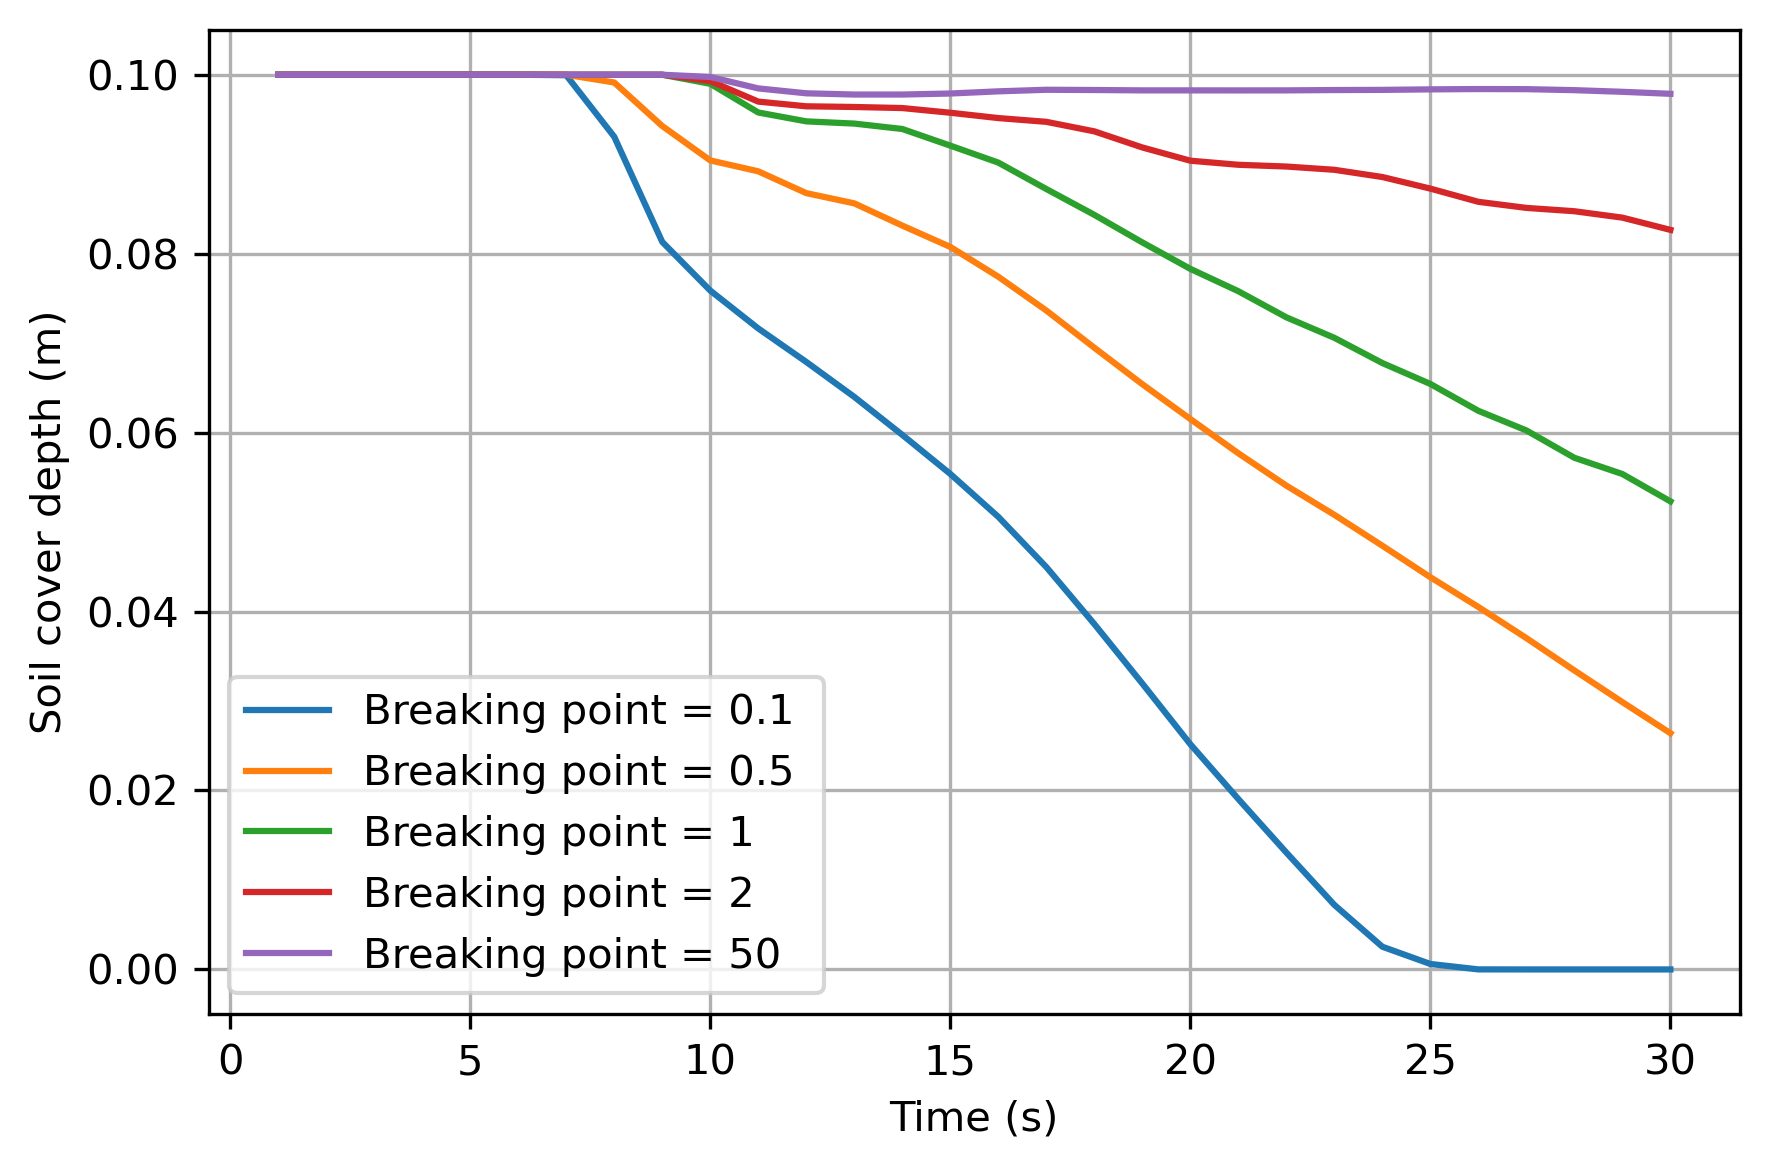

In [6]:
fig, ax1 = plt.subplots(dpi=300)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Soil cover depth (m)')
lh1 = ax1.plot(t_EF_BP01, a_EF_BP01, label='Breaking point = 0.1 ')
lh2 = ax1.plot(t_EF_BP05, a_EF_BP05, label='Breaking point = 0.5')
lh3 = ax1.plot(t_EF_BP1, a_EF_BP1, label='Breaking point = 1')
lh4 = ax1.plot(t_EF_BP2, a_EF_BP2, label='Breaking point = 2')
lh4 = ax1.plot(t_EF_BP50, a_EF_BP50, label='Breaking point = 50')
ax1.legend()
plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('EF_SoilCoverDepth.png')
plt.show()

In [5]:
#a_EE_BP50 = np.full_like(t_EE_BP50, 0.1)

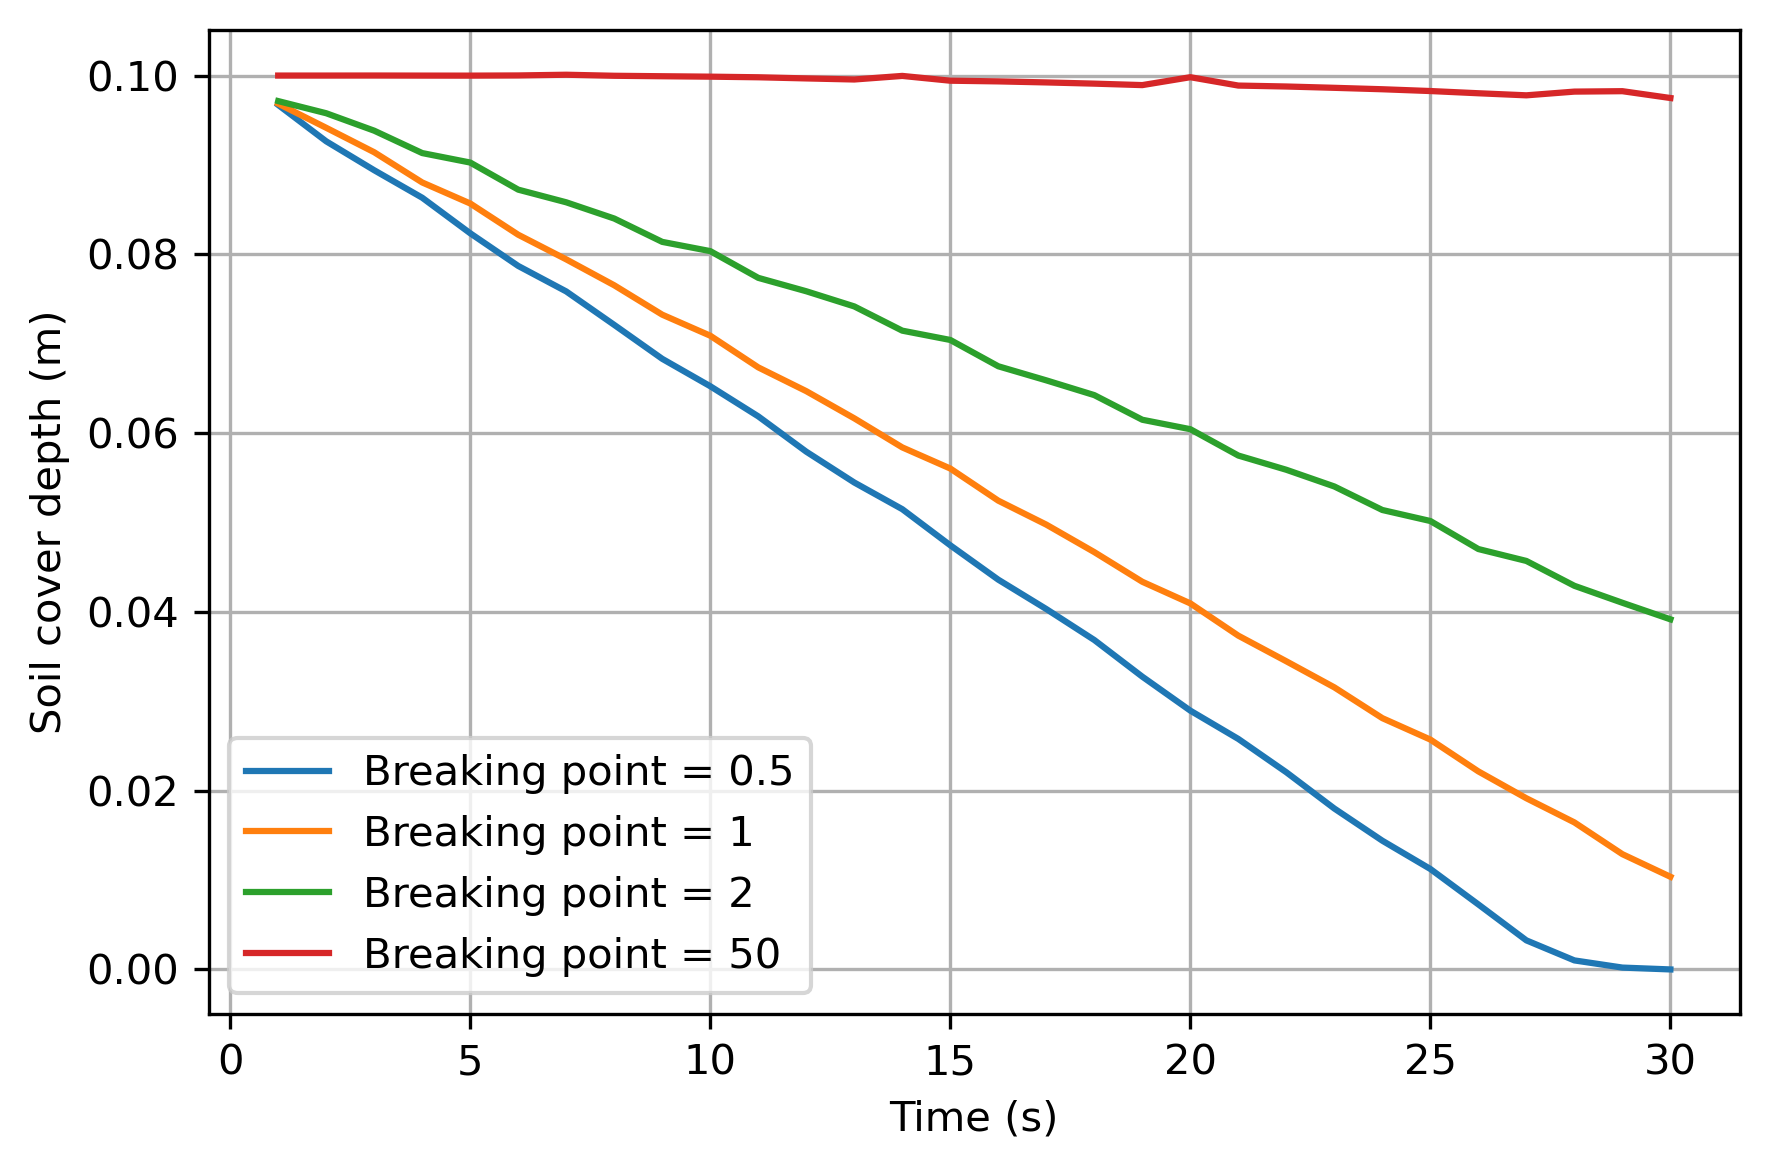

In [6]:
fig, ax1 = plt.subplots(dpi=300)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Soil cover depth (m)')
#lh1 = ax1.plot(t_EE_BP01, a_EE_BP01, label='Breaking point = 0.1')
lh2 = ax1.plot(t_EE_BP05, a_EE_BP05, label='Breaking point = 0.5')
lh3 = ax1.plot(t_EE_BP1, a_EE_BP1, label='Breaking point = 1')
lh4 = ax1.plot(t_EE_BP2, a_EE_BP2, label='Breaking point = 2')
lh4 = ax1.plot(t_EE_BP50, a_EE_BP50, label='Breaking point = 50')
ax1.legend()
plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('EE_SoilCoverDepth.png')
plt.show()

fig, ax1 = plt.subplots(dpi=300)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Soil cover depth (m)')
lh1 = ax1.plot(t_EE_BP01N, a_EE_BP01N, label='Breaking point = 0.1')
lh2 = ax1.plot(t_EE_BP05N, a_EE_BP05N, label='Breaking point = 0.5')
lh3 = ax1.plot(t_EE_BP1N, a_EE_BP1N, label='Breaking point = 1')
lh4 = ax1.plot(t_EE_BP2N, a_EE_BP2N, label='Breaking point = 2')
ax1.legend()
plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('EE_N_SoilCoverDepth.png')
plt.show()

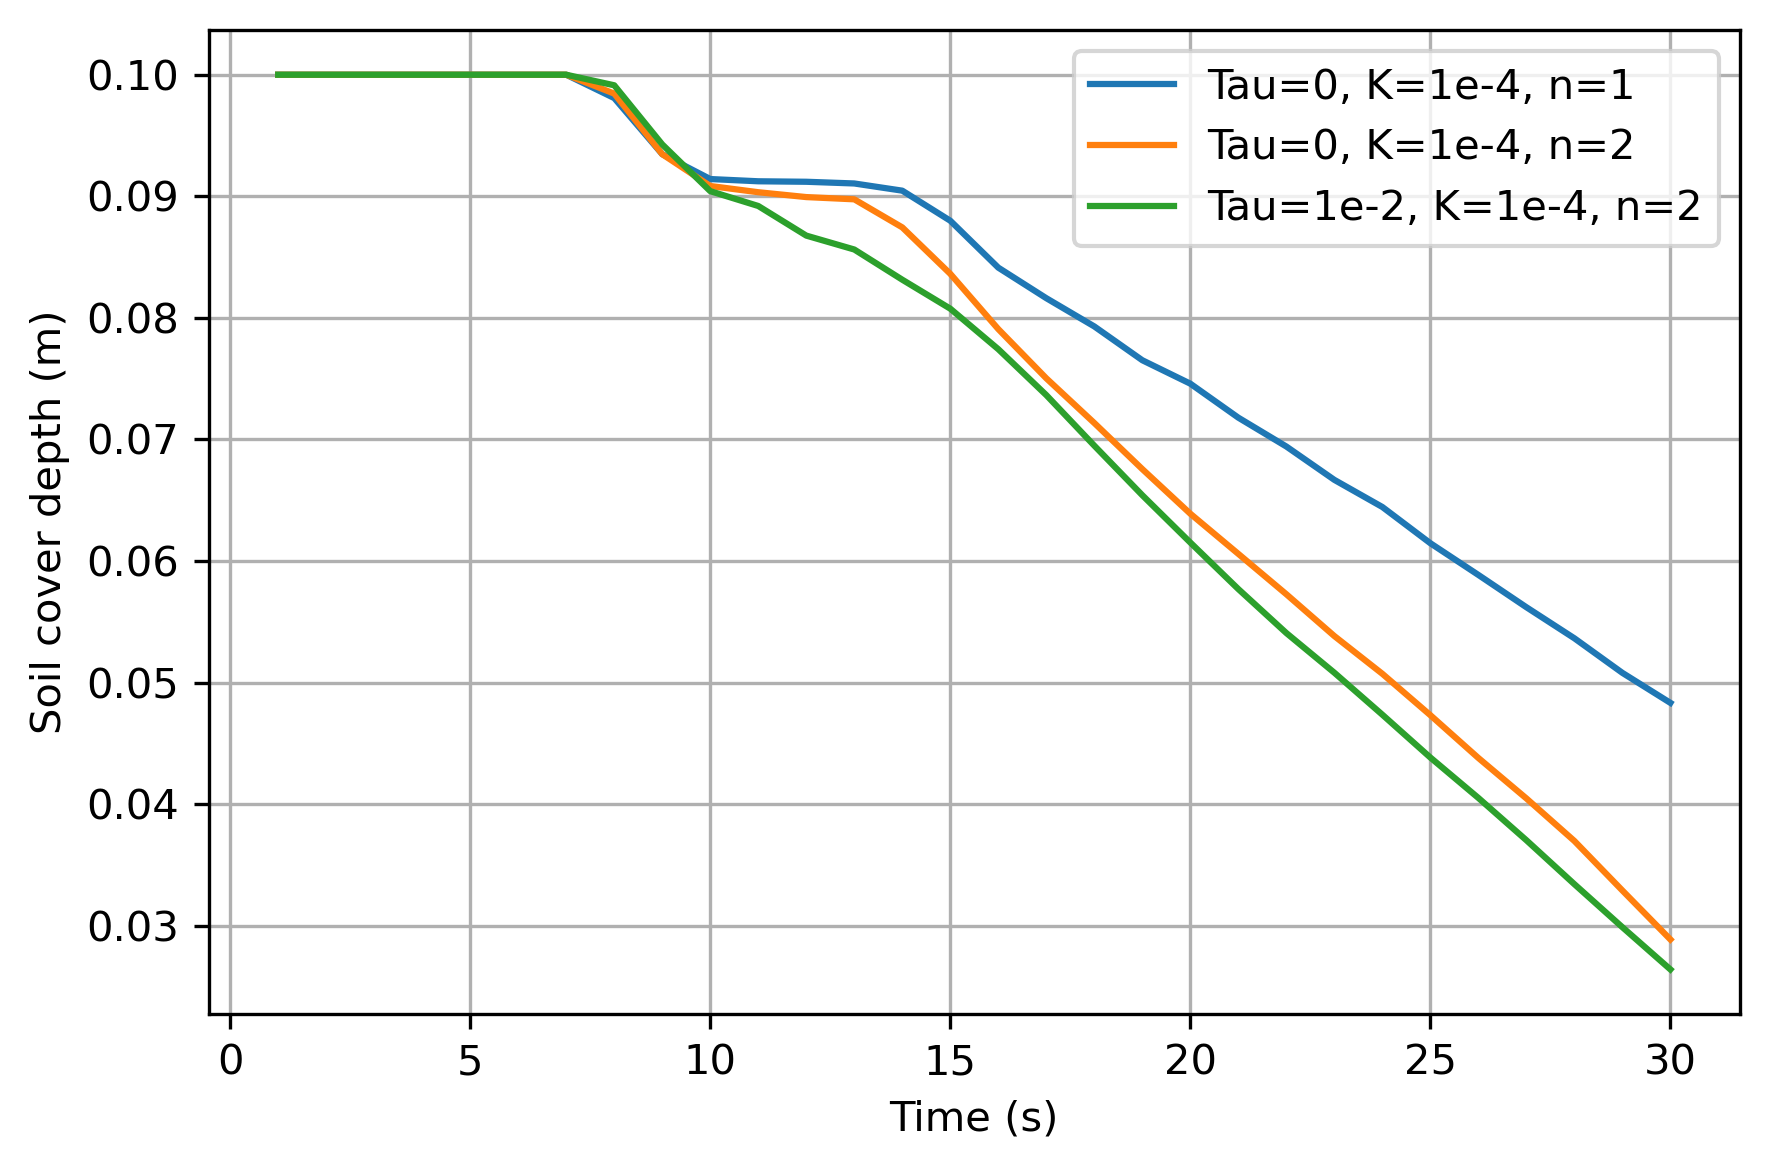

In [7]:
fig, ax1 = plt.subplots(dpi=300)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Soil cover depth (m)')
#lh1 = ax1.plot(t_EF_BP05_N, a_EF_BP05_N, label='Tau=0, K=1e-6, n=1')
lh1 = ax1.plot(t_EF_BP05_N_K1em4, a_EF_BP05_N_K1em4, label='Tau=0, K=1e-4, n=1')
lh2 = ax1.plot(t_EF_BP05_Tau0, a_EF_BP05_Tau0, label='Tau=0, K=1e-4, n=2')
lh2 = ax1.plot(t_EF_BP05, a_EF_BP05, label='Tau=1e-2, K=1e-4, n=2')
ax1.legend()
plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('EF_NNCompare_SoilCoverDepth.png')
plt.show()

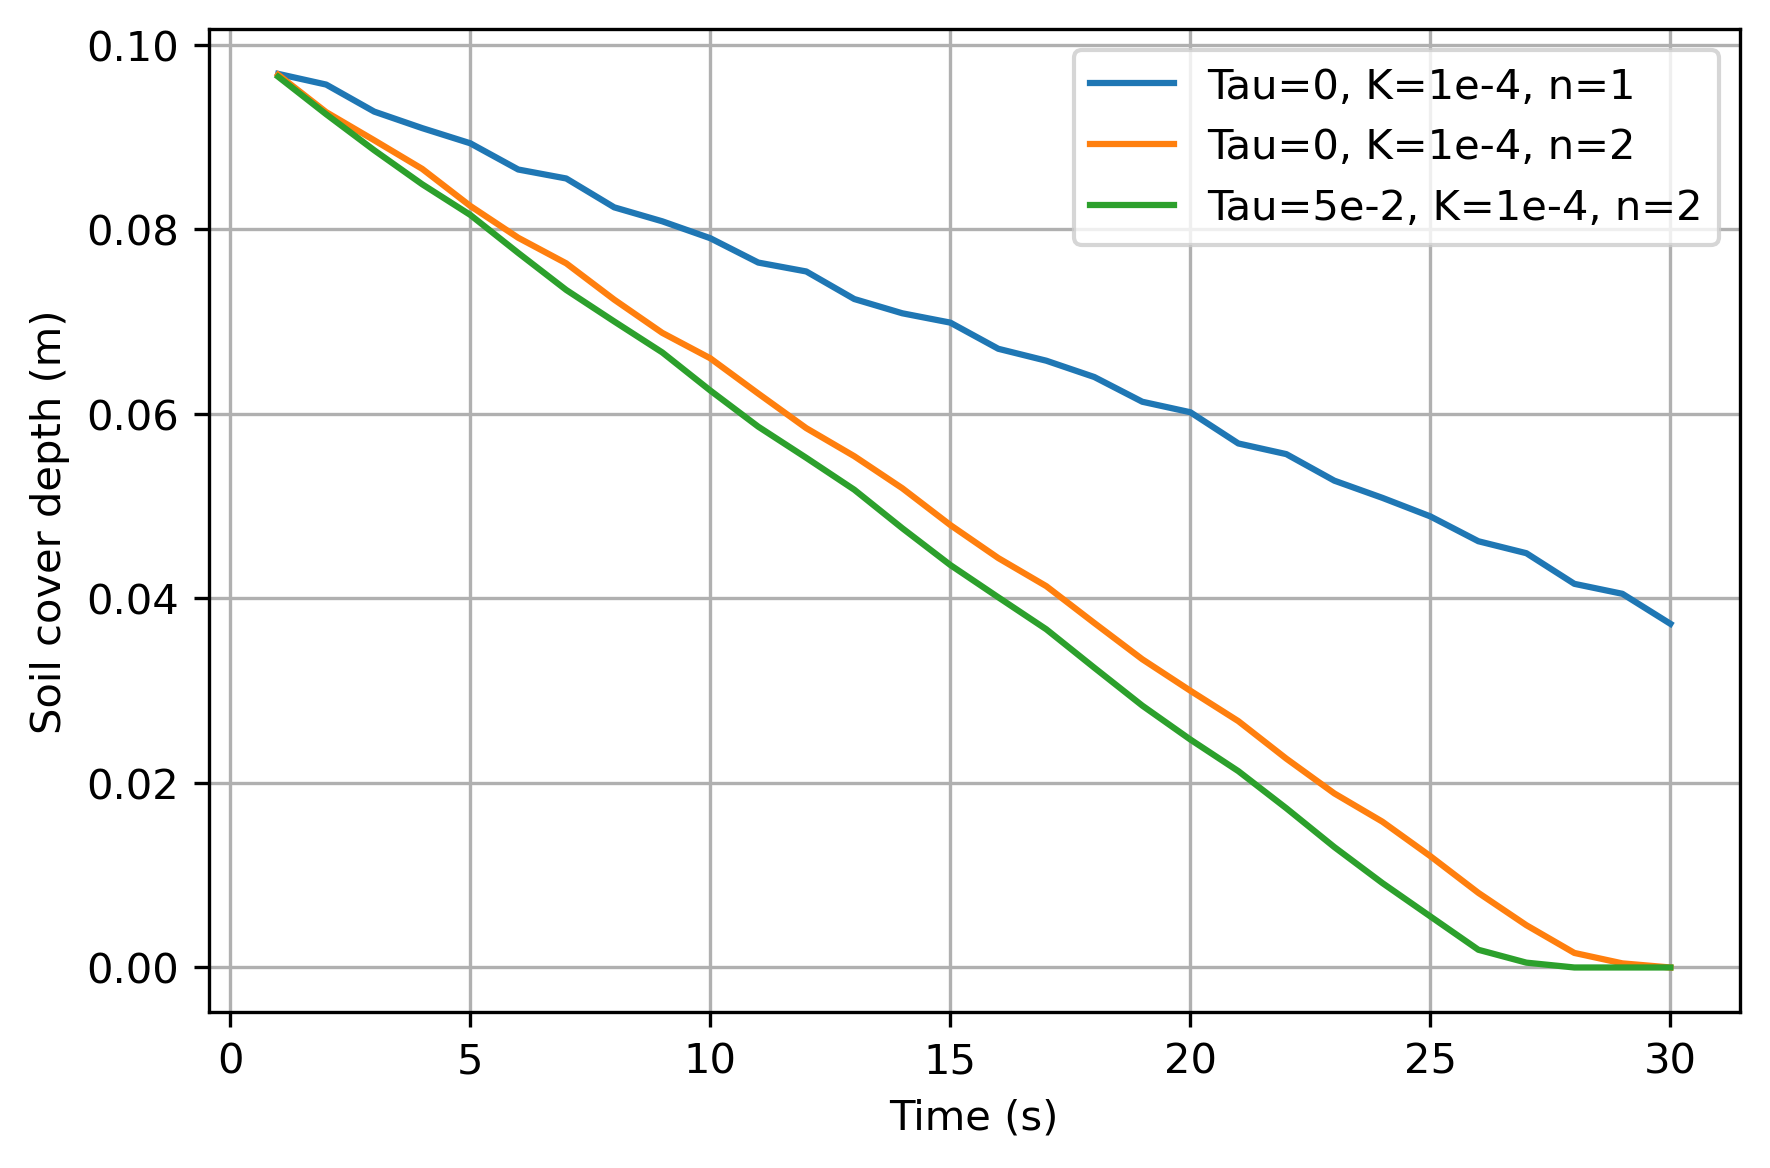

In [8]:
fig, ax1 = plt.subplots(dpi=300)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Soil cover depth (m)')
#lh1 = ax1.plot(t_EE_BP05_N, a_EE_BP05_N, label='Tau=0, K=1e-6, n=1')
lh1 = ax1.plot(t_EE_BP05_N_K1em4, a_EE_BP05_N_K1em4, label='Tau=0, K=1e-4, n=1')
lh2 = ax1.plot(t_EE_BP05_Tau0, a_EE_BP05_Tau0, label='Tau=0, K=1e-4, n=2')
lh2 = ax1.plot(t_EE_BP05_Tau5em2, a_EE_BP05_Tau5em2, label='Tau=5e-2, K=1e-4, n=2')
ax1.legend()
plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('EE_NNCompare_SoilCoverDepth.png')
plt.show()

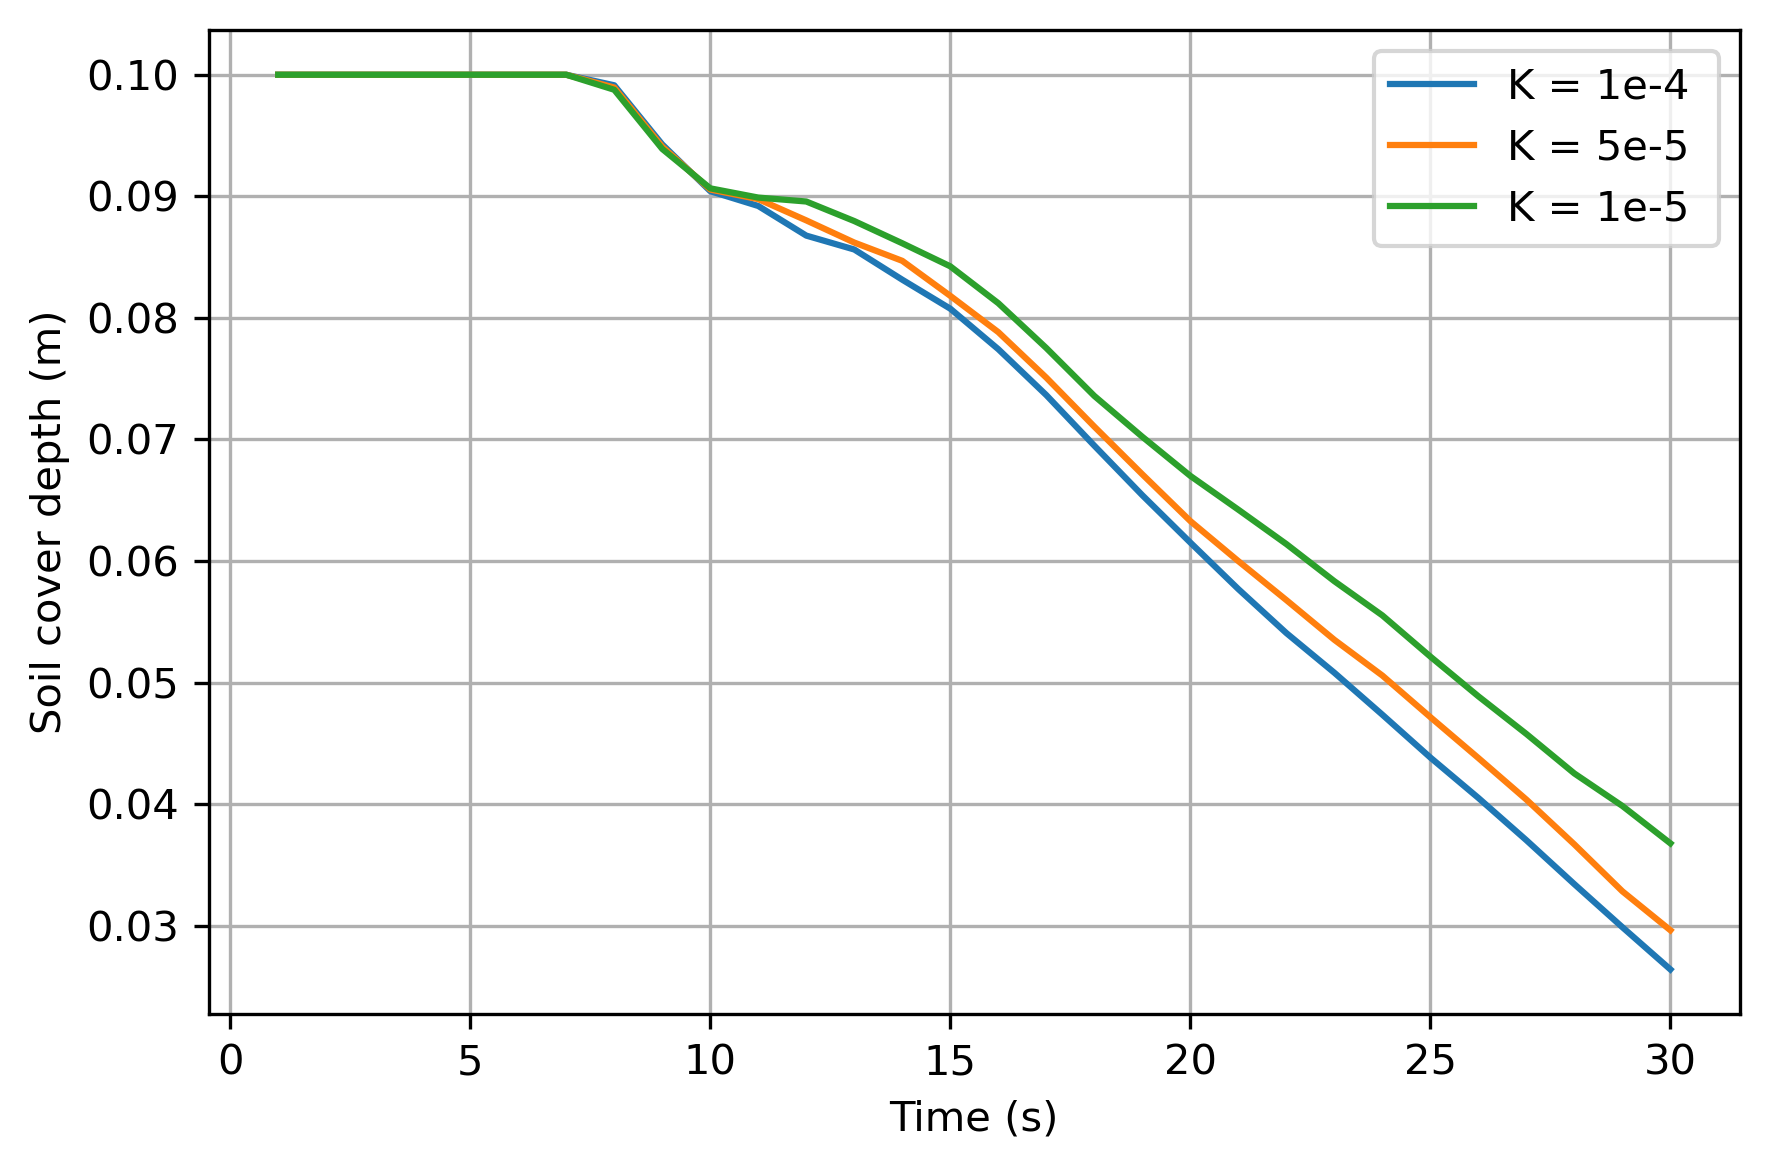

In [8]:
fig, ax1 = plt.subplots(dpi=300)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Soil cover depth (m)')
lh1 = ax1.plot(t_EF_BP05, a_EF_BP05, label='K = 1e-4 ')
lh2 = ax1.plot(t_EF_BP05_K5em5, a_EF_BP05_K5em5, label='K = 5e-5')
lh3 = ax1.plot(t_EF_BP05_K1em5, a_EF_BP05_K1em5, label='K = 1e-5')
ax1.legend()
plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('EF_NNK_SoilCoverDepth.png')
plt.show()

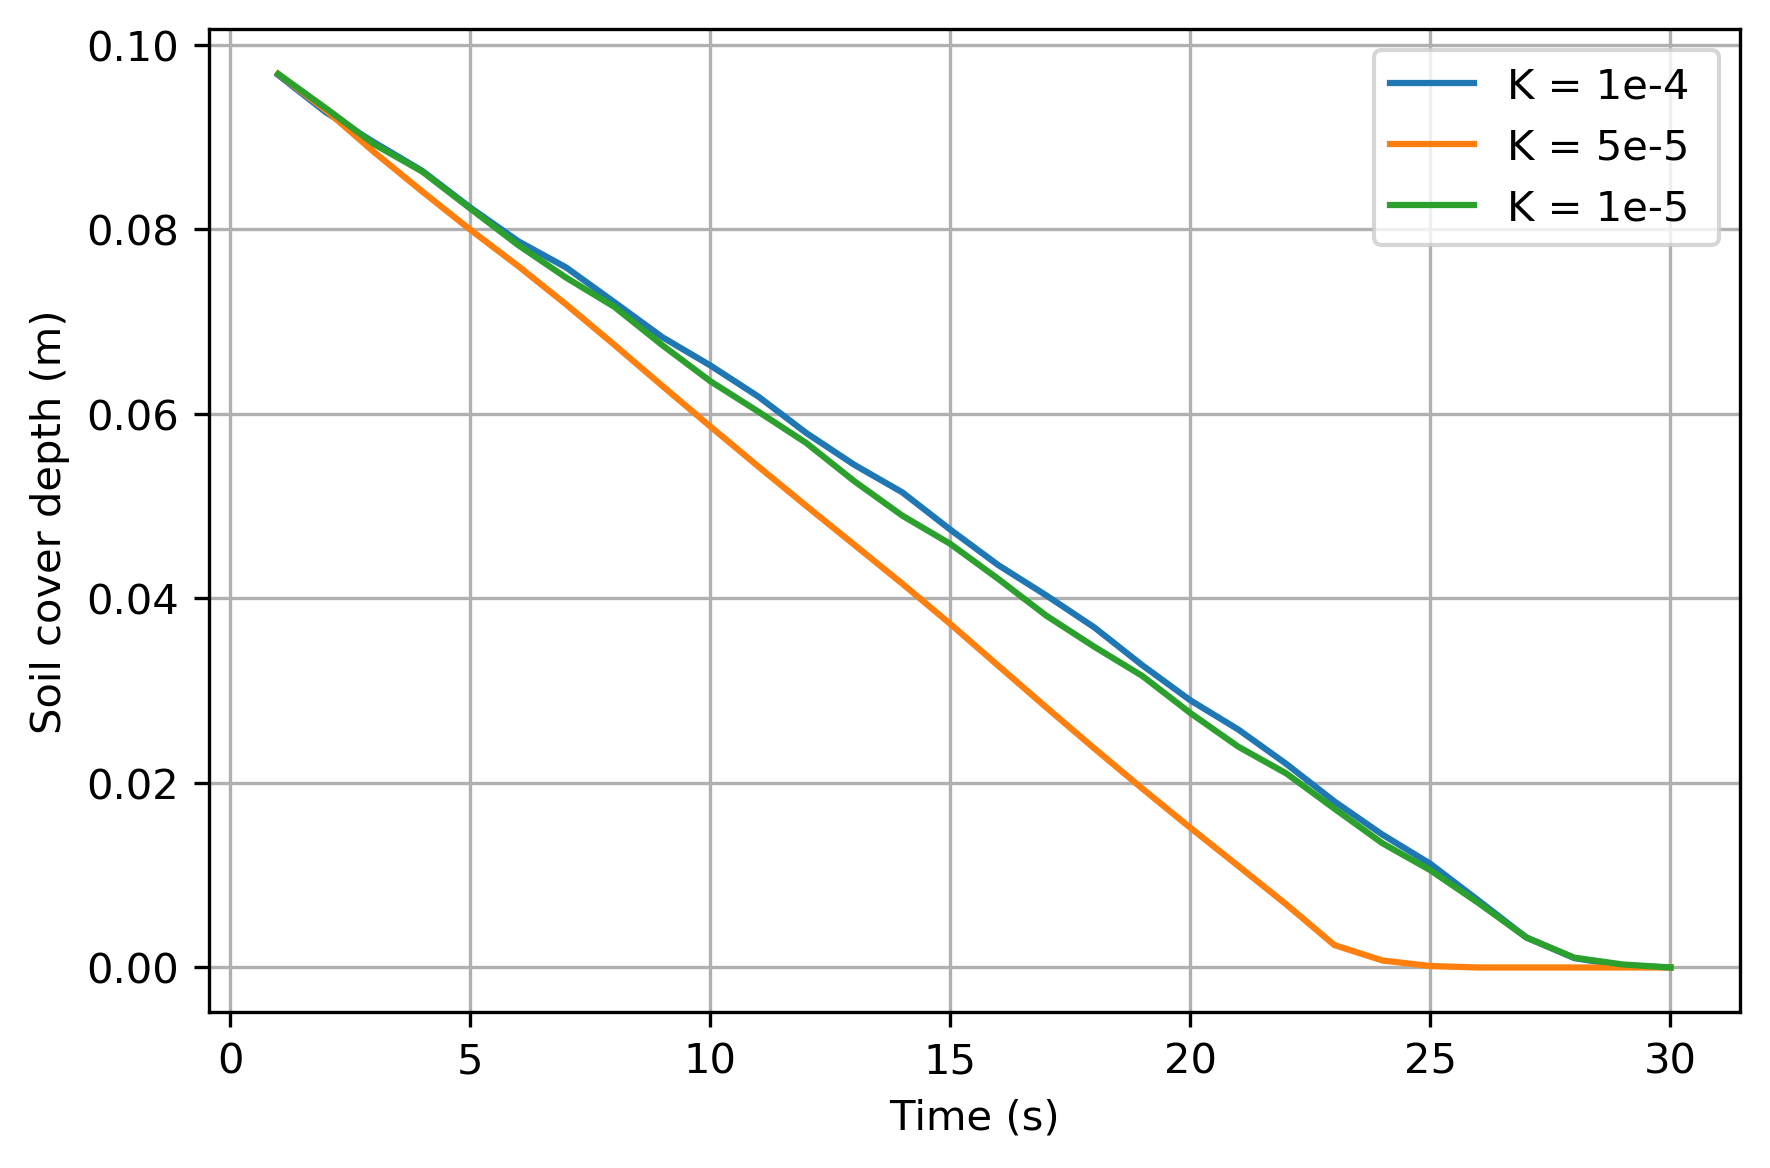

In [59]:
fig, ax1 = plt.subplots(dpi=300)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Soil cover depth (m)')
lh1 = ax1.plot(t_EE_BP05, a_EE_BP05, label='K = 1e-4 ')
lh2 = ax1.plot(t_EE_BP05_K5em5, a_EE_BP05_K5em5, label='K = 5e-5')
lh3 = ax1.plot(t_EE_BP05_K1em5, a_EE_BP05_K1em5, label='K = 1e-5')
ax1.legend()
plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('EE_NNK_SoilCoverDepth.png')
plt.show()

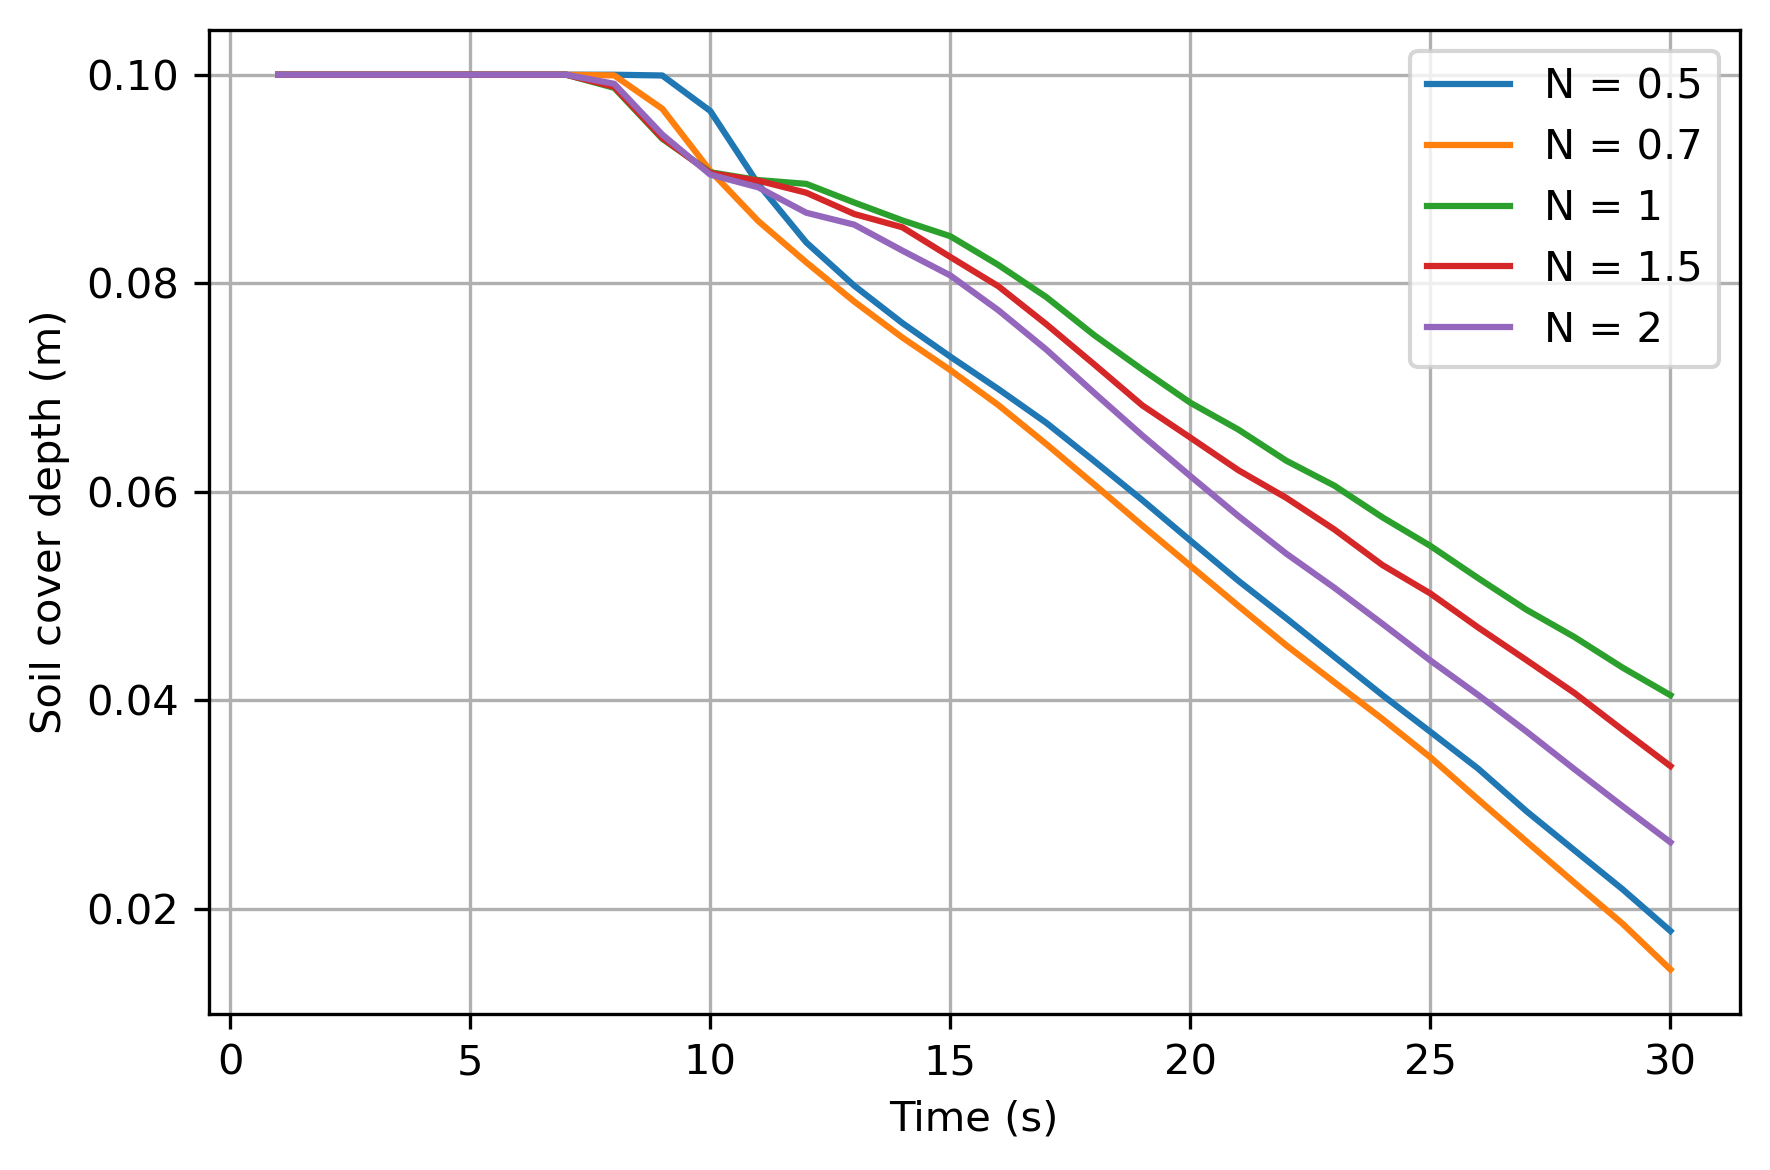

In [9]:
fig, ax1 = plt.subplots(dpi=300)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Soil cover depth (m)')
lh2 = ax1.plot(t_EF_BP05_N05, a_EF_BP05_N05, label='N = 0.5')
lh2 = ax1.plot(t_EF_BP05_N07, a_EF_BP05_N07, label='N = 0.7')
lh2 = ax1.plot(t_EF_BP05_N1, a_EF_BP05_N1, label='N = 1')
lh3 = ax1.plot(t_EF_BP05_N15e1, a_EF_BP05_N15e1, label='N = 1.5')
lh1 = ax1.plot(t_EF_BP05, a_EF_BP05, label='N = 2')
ax1.legend()
plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('EF_NNN_SoilCoverDepth.png')
plt.show()

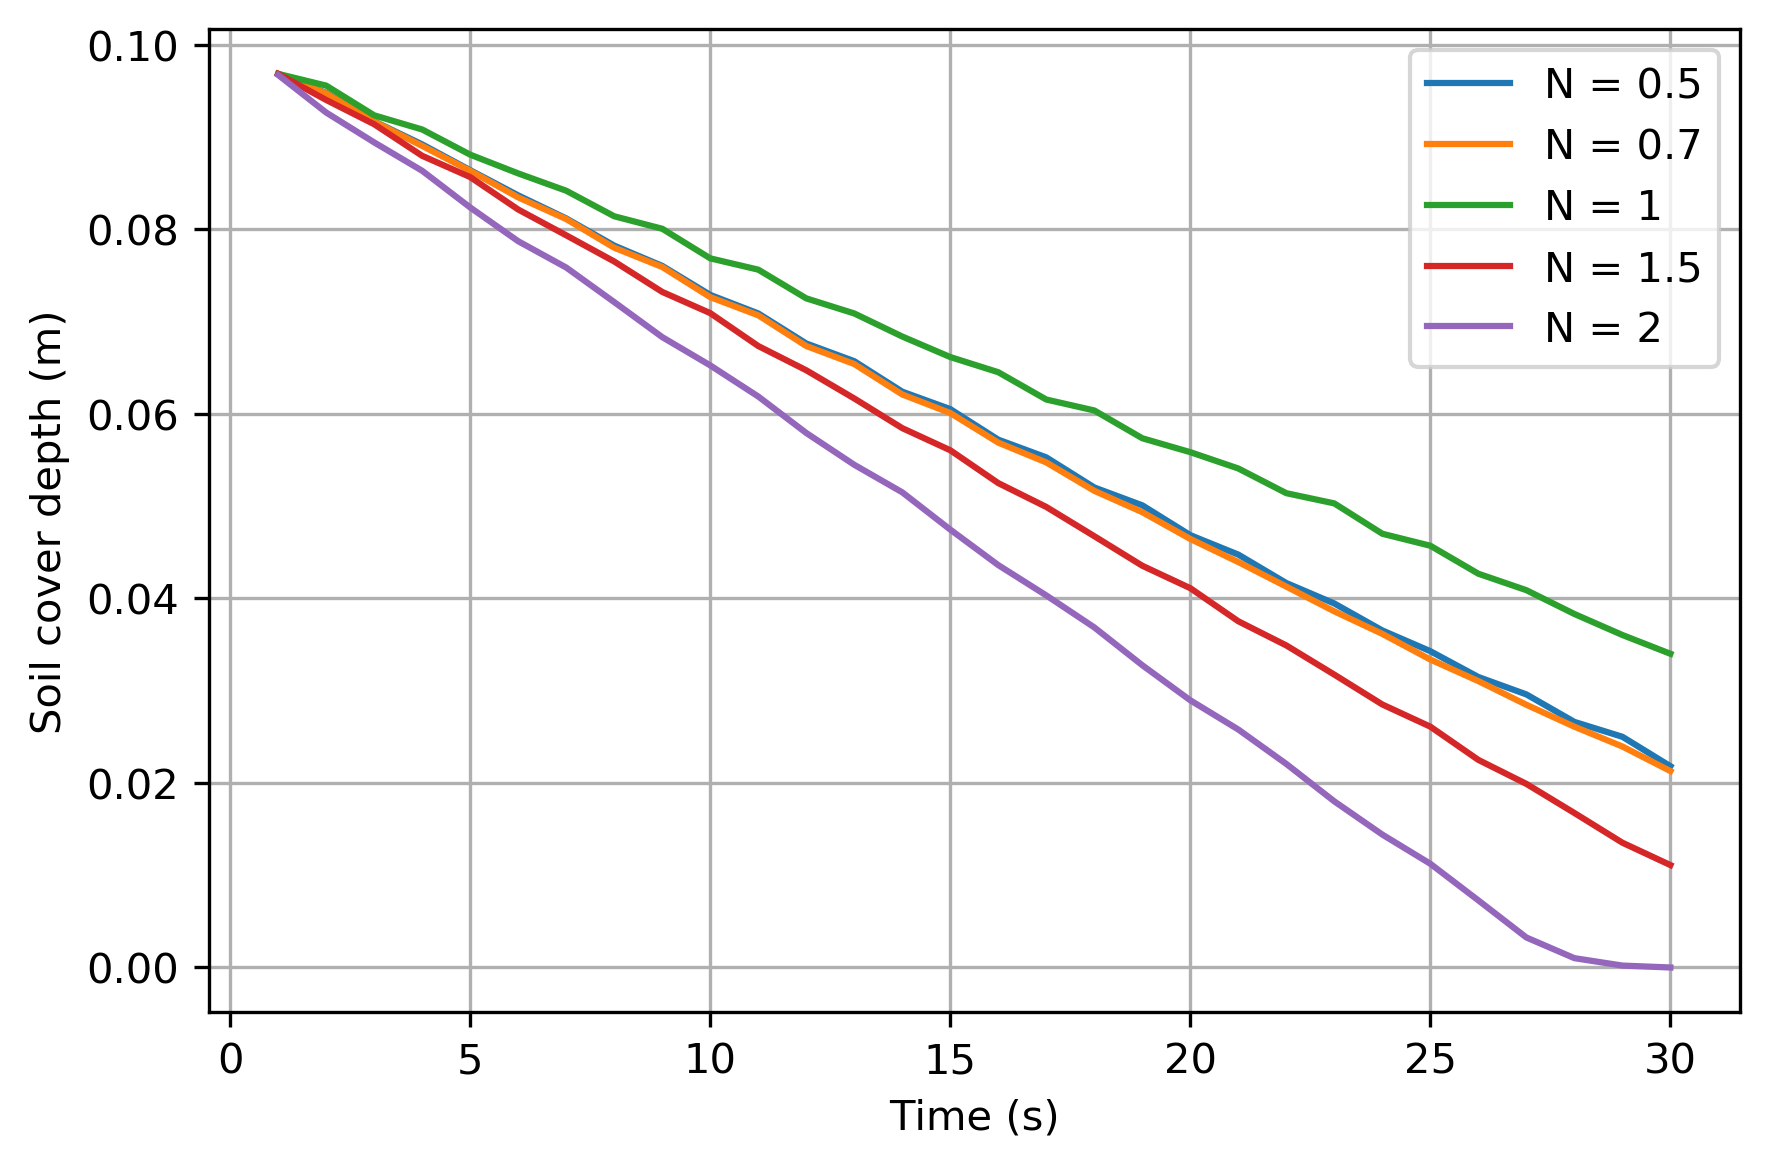

In [61]:
fig, ax1 = plt.subplots(dpi=300)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Soil cover depth (m)')
lh2 = ax1.plot(t_EE_BP05_N05, a_EE_BP05_N05, label='N = 0.5')
lh2 = ax1.plot(t_EE_BP05_N07, a_EE_BP05_N07, label='N = 0.7')
lh2 = ax1.plot(t_EE_BP05_N1, a_EE_BP05_N1, label='N = 1')
lh3 = ax1.plot(t_EE_BP05_N15e1, a_EE_BP05_N15e1, label='N = 1.5')
lh1 = ax1.plot(t_EE_BP05, a_EE_BP05, label='N = 2')
ax1.legend()
plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('EE_NNN_SoilCoverDepth.png')
plt.show()

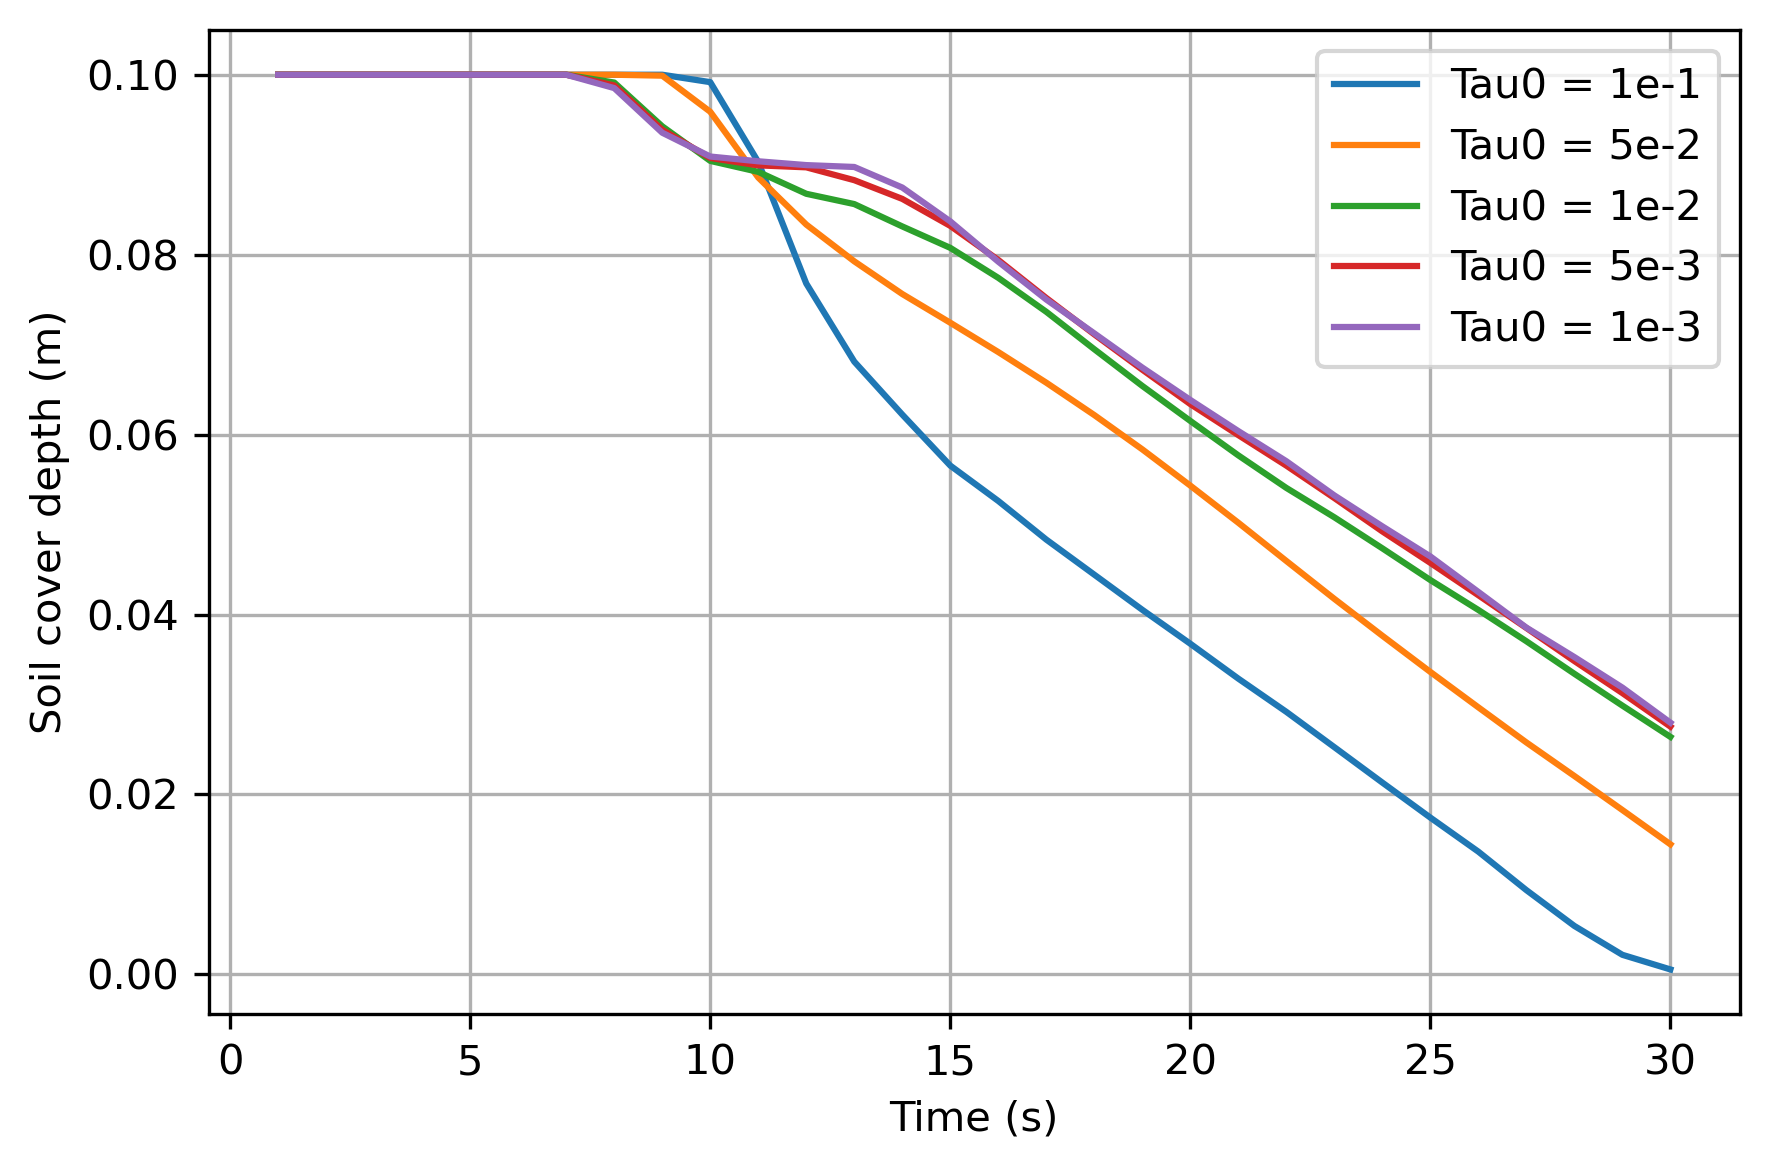

In [10]:
fig, ax1 = plt.subplots(dpi=300)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Soil cover depth (m)')
lh4 = ax1.plot(t_EF_BP05_Tau1em1, a_EF_BP05_Tau1em1, label='Tau0 = 1e-1')
lh4 = ax1.plot(t_EF_BP05_Tau5em2, a_EF_BP05_Tau5em2, label='Tau0 = 5e-2')
lh1 = ax1.plot(t_EF_BP05, a_EF_BP05, label='Tau0 = 1e-2')
lh3 = ax1.plot(t_EF_BP05_Tau5em3, a_EF_BP05_Tau5em3, label='Tau0 = 5e-3')
lh2 = ax1.plot(t_EF_BP05_Tau1em3, a_EF_BP05_Tau1em3, label='Tau0 = 1e-3')
ax1.legend()
plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('EF_NNTau_SoilCoverDepth.png')
plt.show()

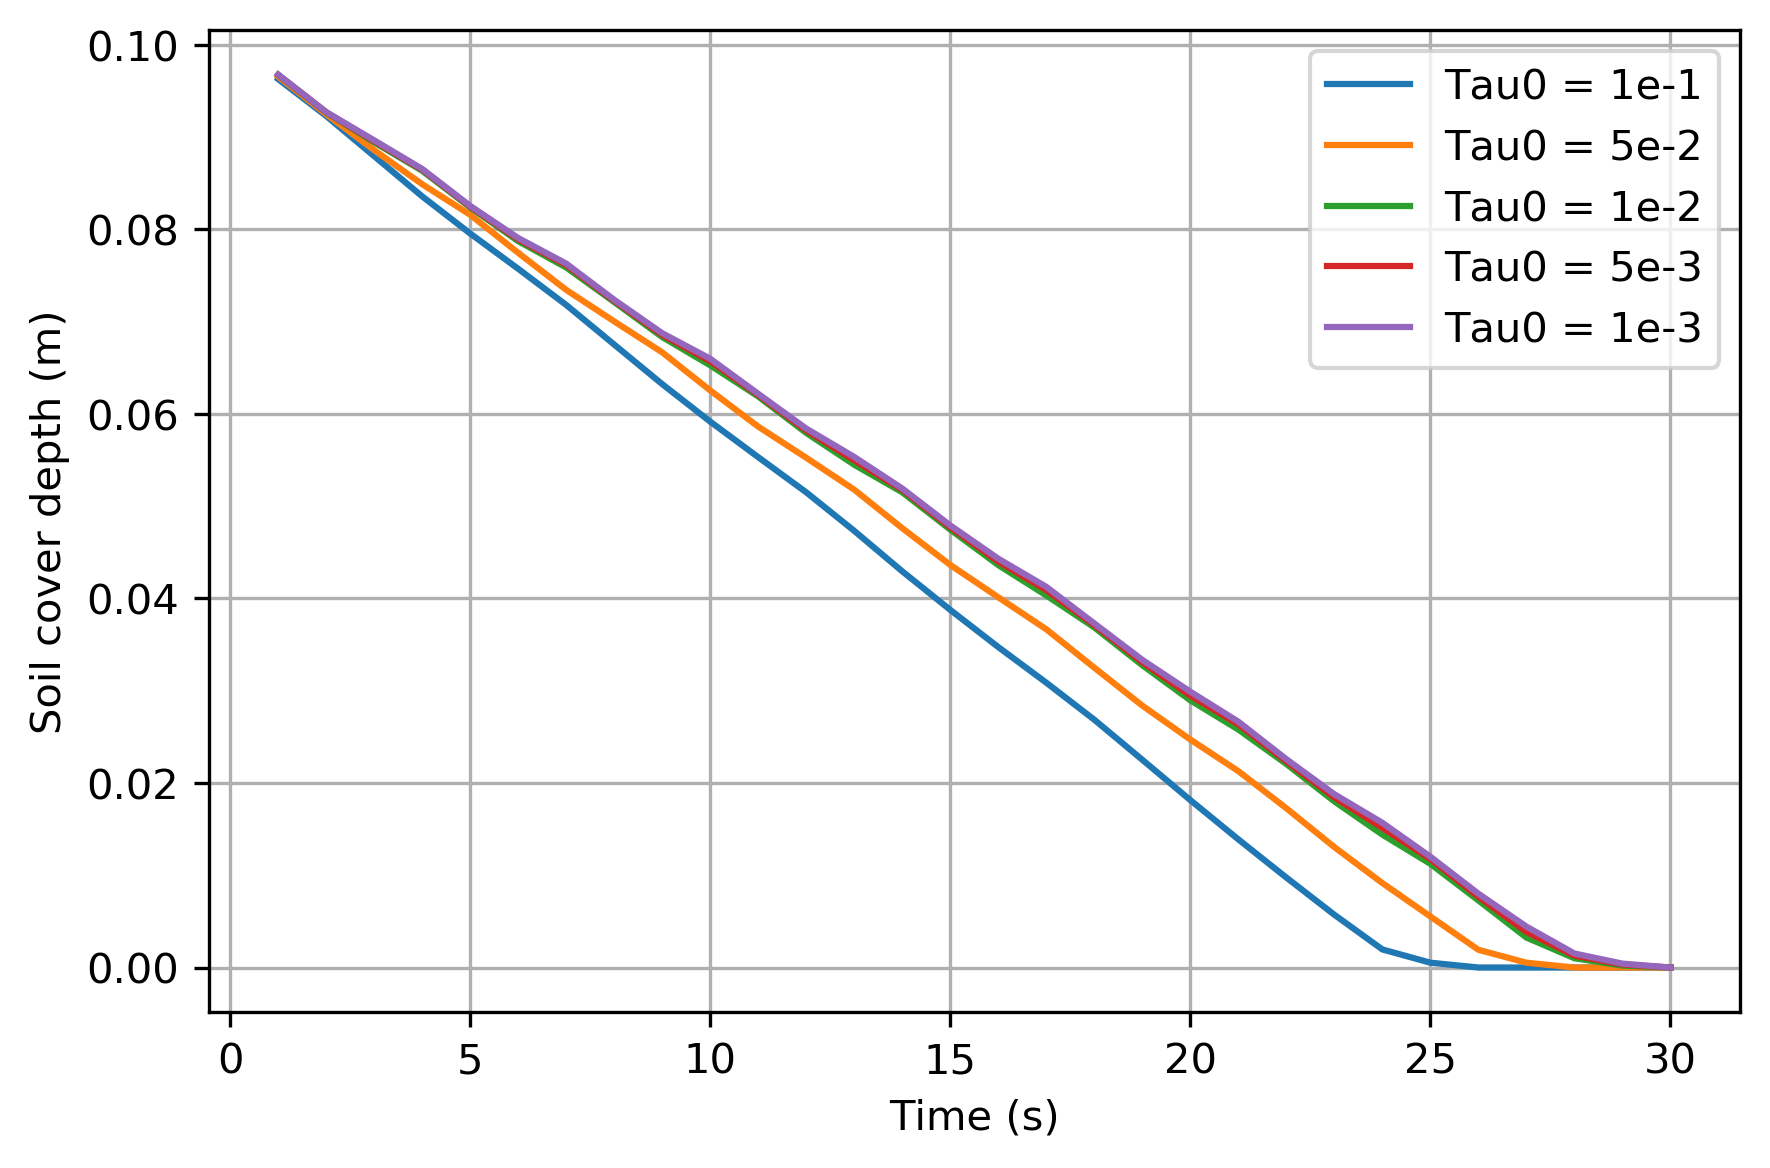

In [63]:
fig, ax1 = plt.subplots(dpi=300)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Soil cover depth (m)')
lh4 = ax1.plot(t_EE_BP05_Tau1em1, a_EE_BP05_Tau1em1, label='Tau0 = 1e-1')
lh4 = ax1.plot(t_EE_BP05_Tau5em2, a_EE_BP05_Tau5em2, label='Tau0 = 5e-2')
lh1 = ax1.plot(t_EE_BP05, a_EE_BP05, label='Tau0 = 1e-2')
lh3 = ax1.plot(t_EE_BP05_Tau5em3, a_EE_BP05_Tau5em3, label='Tau0 = 5e-3')
lh2 = ax1.plot(t_EE_BP05_Tau1em3, a_EE_BP05_Tau1em3, label='Tau0 = 1e-3')
ax1.legend()
plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('EE_NNTau_SoilCoverDepth.png')
plt.show()